Something goes wrong at the end of the SYN record, ~2012. Somehow the daily average is all jumbled. Likely something changed in processing and never got fixed with the daily data because I never noticed. This is demonstrated and fixed below, new output is saved

After some investigation, it appears that it may have to do with flipping the array. The SYN array is upside down relative to all other data. In the daily data that I was looking at, the array was never flipped. This could explain the strange discontinuity.

In [1]:
####################################################################################################
# CR.Composite.ipynb
# Karl Lapo August/2015
####################################################################################################
# Composites of annual cycle, motivation for indexing 
####################################################################################################

# must insert this statement to render the plots within the notebook
# this is specific to the ipython notebook
%matplotlib inline

## Import statements
# netcdf/numpy/xray/stats
import numpy as np
import xray
import pandas as pd

# system interaction
import os

# import subplots function for plotting
import seaborn as sns
import matplotlib
from matplotlib.pyplot import subplots
import matplotlib.pyplot as plt

## Directory listing
dir_data = '/Users/karllapo/gdrive/SnowHydrology/proj/CloudClimatology/data'

# List of sub-directory names for each data set
dir_SYN = '/CERES_SYN'

In [2]:
###############################
## SYN (old data w/ problem) ##
os.chdir(dir_data+dir_SYN)
syn = xray.open_dataset('CA.syn.irrad.daily.nc')

######################
## Remake SYN daily ##
os.chdir(dir_data+dir_SYN)
syn_3hr = xray.open_dataset('CA.SYN.irrad.nc')

In [3]:
#### Format and save output of correct data
## Format SYN data (daily w/ problem)
syn.longitude.values = syn.longitude.values-360
syn.latitude.values = syn.latitude.values[::-1]
# Flip the syn array spatially
for d in np.arange(syn.time.size):
    syn.SWdwn.values[d-1,:,:] = np.flipud(syn.SWdwn.values[d-1,:,:])
    syn.LWdwn.values[d-1,:,:] = np.flipud(syn.LWdwn.values[d-1,:,:])

## Format SYN data (3hr)
syn_3hr.longitude.values = syn_3hr.longitude.values-360
syn_3hr.latitude.values = syn_3hr.latitude.values[::-1]
for d in np.arange(syn_3hr.time.size):
    syn_3hr.SWdwn.values[d-1,:,:] = np.flipud(syn_3hr.SWdwn.values[d-1,:,:])
    syn_3hr.LWdwn.values[d-1,:,:] = np.flipud(syn_3hr.LWdwn.values[d-1,:,:])

## Resample
syn_day = syn_3hr.resample(freq='D', dim='time', how='mean')
syn_month = syn_3hr.resample(freq='M', dim='time', how='mean')

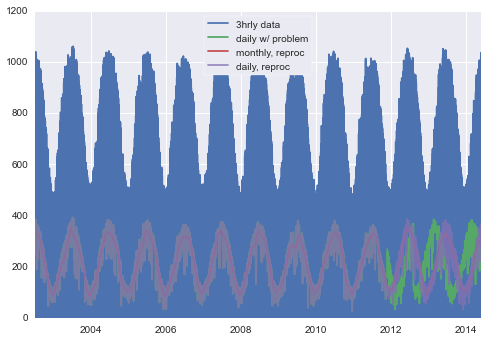

In [4]:
#### Plot differences
plt.plot(syn_3hr.time,np.squeeze(syn_3hr.SWdwn.values[:,4,4]),label='3hrly data')
plt.plot(syn.time,syn.SWdwn.values[:,4,4],label='daily w/ problem')
plt.plot(syn_month.time-pd.Timedelta(days=15),syn_month.SWdwn.values[:,4,4],label='monthly, reproc')
plt.plot(syn_day.time,syn_day.SWdwn.values[:,4,4],alpha=.8,label='daily, reproc')
ax=plt.gca()
ax.legend(loc='best',frameon=True)


In [13]:
### Save output of correct data
syn_day.to_netcdf('CA.SYN.irrad.daily.nc_1',mode='w')
syn_month.to_netcdf('CA.SYN.irrad.monthly.nc_1',mode='w')


<xray.Dataset>
Dimensions:        (latitude: 8, longitude: 9, time: 4353)
Coordinates:
  * latitude       (latitude) float32 34.499 35.499 36.4989 37.4989 38.4988 ...
  * longitude      (longitude) float32 -123.5 -122.5 -121.5 -120.5 -119.5 ...
  * time           (time) datetime64[ns] 2002-07-01 2002-07-02 2002-07-03 ...
Data variables:
    LWdwn          (time, latitude, longitude) float64 nan nan nan nan 341.8 ...
    SWdwn          (time, latitude, longitude) float64 nan nan nan nan 297.9 ...
    Elev           (time, latitude, longitude) float64 971.7 1.265e+03 ...
    SWdwn_Diffuse  (time, latitude, longitude) float64 49.29 53.65 43.56 ...
    SWdwn_Direct   (time, latitude, longitude) float64 318.1 317.2 329.9 ...
